### 1. 로지스틱 회귀로의 발전
(1) 퍼셉트론<br>
로지스틱 회귀는 이진분류 문제에서 최적의 가중치를 학습하는 퍼셉트론 알고리즘으로부터 발전되었습니다.<br>
퍼셉트론은 선형회귀와 비슷하나 마지막 단계에서 계단함수를 지나면서 샘플을 이진분류합니다.<br>
이렇게 계단 함수를 통과한 값을 이용하여 가중치와 절편을 업데이트 합니다.<br><br>
(2)아달린<br>
아달린은 선형함수의 결과를 학습에, 계단 함수의 결과는 예측에만 사용합니다.<br><br>
(3) 로지스틱 회귀<br>
로지스틱회귀는 선형함수를 통과시켜 얻은 값을 임계 함수로 보내기 전에 활성화 함수를 통과시킵니다.<br>
또 임계 함수는 계단 함수와 역할은 비슷하지만 활성화함수의 출력값을 사용한다는 점이 다릅니다.<br>
* 활성화 함수 : 비선형 함수인 시그모이드 함수 사용
    * 시그모이드 함수는 선형 함수의 결과를 0과 1 사이의 확률 값으로 변환해 줍니다.

### 2. 로지스틱 회귀의 손실함수
로지스틱 회귀 함수에서 사용할 수 있는 손실함수는 크로스 엔트로피 손실함수의 이진분류 버전입니다.
로지스틱 회귀 함수를 미분한 결과는 다음과 같습니다.
* 가중치에 대한 미분 =  -(y - y_hat) * x
    * 가중치 업데이트 = w + (y - y_hat) * x
* 절편에 대한 미분 = -(y - y_hat)
    * 절편 업데이트 = b + (y - y_hat)

### 3. 유방암 데이터 샘플을 정상 종양과 악성종양으로 분류하기
(1) 유방암 데이터 세트 준비하기
* 먼저 사이킷런에 있는 위스콘신 유방암 데이터 세트를 불러오도록 해보겠습니다.

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

해당 Bunch 클래스 객체인 cancer의 data와 target을 확인해보겠습니다.
* data는 30개의 특성으로 이루어진 569개의 샘플로 구성되어있습니다.
* target은 이진 분류값인 0과 1로 나누어져 있습니다.

In [44]:
print(cancer.data, cancer.target)
print(cancer.data.shape, cancer.target.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

박스플롯으로 해당 데이터들의 특성을 볼 수 있습니다.

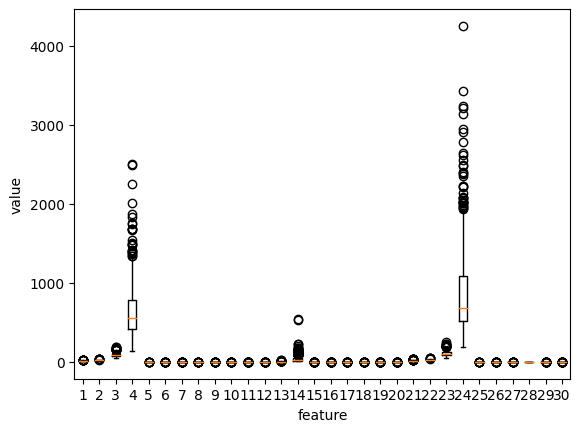

In [45]:
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

4번, 14번, 24번 특성이 유독 분포 범위가 넓은 것을 확인 할 수 있습니다.<br>
어떤 인덱스들인지 한번 확인해봅시다.

In [46]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

타깃 데이터를 확인해 보겠습니다. <br>
각 항목이 0과 1로 이루어져 있음을 보았는데, 각 항목이 몇 개인지는 아직 모릅니다. 또, 혹시 빈 값이나 실수로 넣은 2같은 값이 있는지 확인해보려고 합니다.

In [59]:
import numpy as np

np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

다행히 이상한 값이 들어있지도 않았고, 비어있는 값도 없습니다.<br>
또 한 클래스가 거의 희박한 그런 슬픈 경우도 아닙니다.

(2) 학습 데이터 준비

In [48]:
x = cancer.data
y = cancer.target

학습데이터가 준비되었습니다.<br>
훈련된 모델의 실전 성능을 일반화 성능이라고 합니다. 즉, 학습시킨 모델이 학습시킨 데이터가 아닌 다른 데이터에서도 얼마나 잘 작동하는지 판단할 수 있는 기준이 됩니다. 이걸 위해서는 우리는 위의 학습 데이터를 나눠서 일부를 성능 테스트용 데이터로 사용하도록 하겠습니다.

sklearn.model_selection (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
- train_test_split
    - stratify : 훈련 데이터의 클래스 비율과 동일하게 나눌지의 여부
    - test_size : 전체 훈련 데이터에서 테스트 데이터로 나눌 비율

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

그럼 훈련 데이터가 잘 나누어졌는지 한번 확인해볼까요?

In [50]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [51]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [52]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad
                
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5
    
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)
np.mean(neuron.predict(x_test) == y_test)

/tmp/ipykernel_6685/1769139502.py:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

In [53]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)
                
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x,  y):
        return np.mean(self.predict(x) == y)
    
    
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/tmp/ipykernel_6685/4076453264.py:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9298245614035088

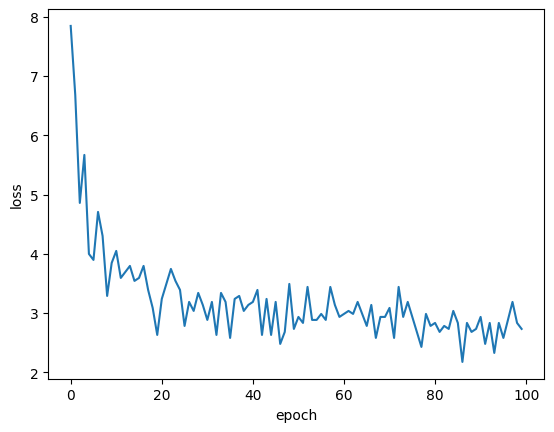

In [54]:
import matplotlib.pyplot as plt

plt.plot(layer.losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

사이킷런에서는 경사 하강법을 구현한 클래스를 제공합니다.
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [55]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [56]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

/home/sydney/2023_SelfLearning/Doit_딥러닝입문/DoitDL_venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

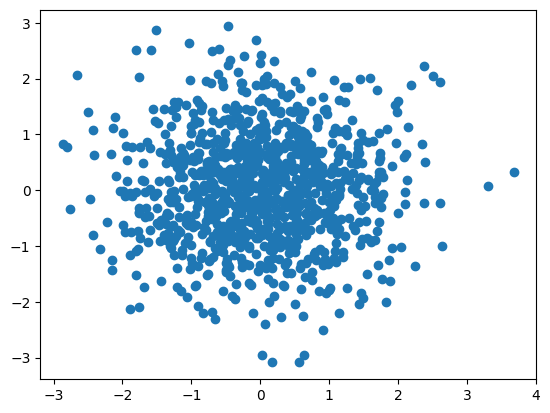

In [57]:
import matplotlib.pyplot as plt

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()